Homework 1 was worked on by Varun Gopal and Tyler Dixon.

# Homework 1

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 20

## Getting stock data

We can use `yfinance` to download historical price data from Yahoo! Finance. This package is not part of the standard python library, so you'll have to [install it](https://pypi.org/project/yfinance/) if you haven't previously done so.

In [2]:
import yfinance as yf

Here's an example of downloading data for multiple tickers:

In [3]:
px = yf.download(tickers=['AMZN', 'PFE', 'GE', 'TSLA'],
                   interval='1d',
                   start='2013-01-01',
                   end='2023-03-01')

px = px['Adj Close']

px.head()

[*********************100%***********************]  4 of 4 completed


,AMZN,GE,PFE,TSLA
Date,,,,
2013-01-02,12.8655,103.887466,17.030140,2.357333
2013-01-03,12.9240,102.719093,16.990705,2.318000
2013-01-04,12.9575,103.205940,17.063009,2.293333
2013-01-07,13.4230,102.865173,17.076147,2.289333
2013-01-08,13.3190,101.745453,17.102444,2.245333


One way to plot prices is to create an index by initializing each price to 1, like so:

<AxesSubplot:xlabel='Date'>

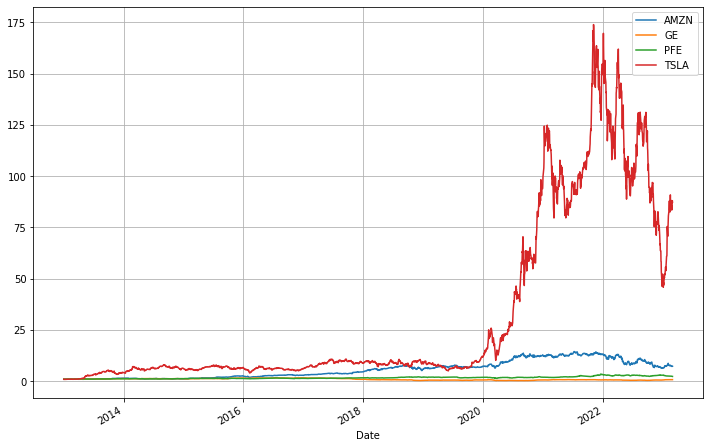

In [4]:
(px / px.iloc[0]).plot(figsize=(12,8), grid=True)

Tesla's huge return makes it hard to see the performance of the other stocks here. Change the graph so that the scale on the y-axis is in logs. (You can do this without modifying the data; you just need to use an argument to the `plot` function.)

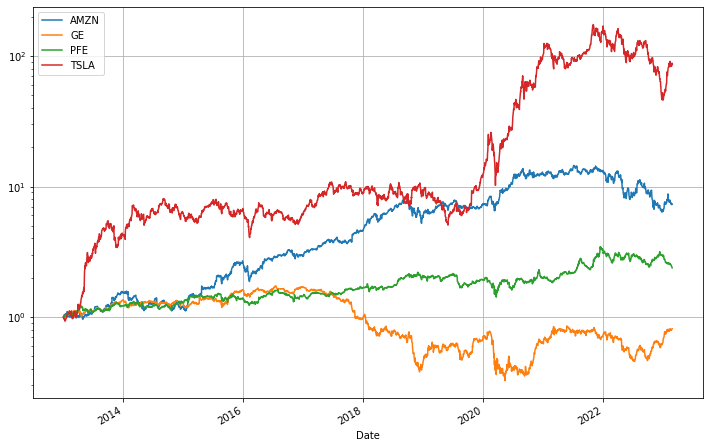

In [5]:
(px / px.iloc[0]).plot(figsize=(12,8), grid=True).set_yscale('log')

Calculate a daily return series for each stock using these prices.

In [6]:
px_ret = px.pct_change().dropna()
px_ret.head()

,AMZN,GE,PFE,TSLA
Date,,,,
2013-01-03,0.004547,-0.011247,-0.002316,-0.016685
2013-01-04,0.002592,0.004740,0.004255,-0.010642
2013-01-07,0.035925,-0.003302,0.000770,-0.001744
2013-01-08,-0.007748,-0.010885,0.001540,-0.019220
2013-01-09,-0.000113,0.002392,0.017294,-0.001187


Use the `.describe()` method to calculate summary statistics on returns. Do the statistics look reasonable? Give a couple examples of what gives you confidence that these make sense.

In [7]:
px_ret.describe()

,AMZN,GE,PFE,TSLA
count,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.000992,0.000142,0.000435,0.002402
std,0.020664,0.021073,0.013851,0.036243
min,-0.140494,-0.151592,-0.077346,-0.210628
25%,-0.008605,-0.008570,-0.006264,-0.014902
50%,0.001071,0.000000,0.000000,0.001389
75%,0.011176,0.008606,0.006999,0.019245
max,0.141311,0.147299,0.108552,0.243951


Why do they look reasonable? Work on that

The first big indicator is that the median of daily returns is 0. This means that it is just as likely to have a daily loss as it would have a gain.


Now calculate the correlation matrix for these returns. This should just be one line of code!

In [8]:
px_ret.corr()

,AMZN,GE,PFE,TSLA
AMZN,1.000000,0.243290,0.234329,0.371136
GE,0.243290,1.000000,0.287196,0.215416
PFE,0.234329,0.287196,1.000000,0.123169
TSLA,0.371136,0.215416,0.123169,1.000000


This function takes a DataFrame and returns a “long” DataFrame of pairwise correlations:

In [9]:
def pairwise_corr(df):
    corrs = df.corr()
    corrs = corrs.unstack().reset_index()
    corrs.columns = ['tic1', 'tic2', 'corr']
    corrs = corrs[corrs['corr']<1]
    return corrs

Purpose of next two boxes of code are just to get a better understanding of the indexes by including the perfect correlation values as well.

In [10]:
def pairwise_corr_full(df):
    corrs = df.corr()
    corrs = corrs.unstack().reset_index()
    corrs.columns = ['tic1', 'tic2', 'corr']
    return corrs

In [11]:
pairwise_corr_full(px_ret)

,tic1,tic2,corr
0,AMZN,AMZN,1.000000
1,AMZN,GE,0.243290
2,AMZN,PFE,0.234329
3,AMZN,TSLA,0.371136
4,GE,AMZN,0.243290
5,GE,GE,1.000000
6,GE,PFE,0.287196
7,GE,TSLA,0.215416
8,PFE,AMZN,0.234329
9,PFE,GE,0.287196


Call this function with the returns data. Does the number of rows in the result make sense? Why?

Hint: Pay close attention to the index here!

In [12]:
pair_corr = pairwise_corr(px_ret)
pair_corr

,tic1,tic2,corr
1,AMZN,GE,0.243290
2,AMZN,PFE,0.234329
3,AMZN,TSLA,0.371136
4,GE,AMZN,0.243290
6,GE,PFE,0.287196
7,GE,TSLA,0.215416
8,PFE,AMZN,0.234329
9,PFE,GE,0.287196
11,PFE,TSLA,0.123169
12,TSLA,AMZN,0.371136


This makes sense. There are 16 overall correlations in the table. However, we can get rid of the correlations of each ticker upon itself which reduces 16 to 12 points. 

What is the *average* correlation of these firms?

In [13]:
avg_corr = pair_corr.mean()
avg_corr['corr']

C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\1221470991.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_corr = pair_corr.mean()


0.24575605208423137

The average correlation between these pairs of stocks is 0.25.

Since each pair appears twice, the mean calculation is correct, but if we want to calculate the standard deviation of these correlations, we must be careful to keep only one value for each pair.

One trick for doing this is to require that `tic1` is less than (or, if you prefer, greater than) `tic2`. In other words, just require that the row we keep has the first ticker appear before the second ticker in an alpabetical ordering.

Using this approach, calculate the standard deviation of the correlations.

In [14]:
std_corr = pair_corr[pair_corr['tic1'] < pair_corr['tic2']].std()
std_corr['corr']

C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\1687377773.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_corr = pair_corr[pair_corr['tic1'] < pair_corr['tic2']].std()


0.08188060273219287

Take the code you just wrote and build a *function* that takes a DataFrame and returns a single number giving the *average* pairwise correlation across firms. Test your function on the data returns data you used above.

In [15]:
def pairwise_corr_avg(df):
    corrs = df.corr()
    corrs = corrs.unstack().reset_index()
    corrs.columns = ['tic1', 'tic2', 'corr']
    corrs = corrs[corrs['corr']<1]
    return corrs.mean()

pairwise_corr_avg(px_ret)

C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()


corr    0.245756
dtype: float64

Use `groupby` to calculate the average pairwise correlation in each year by using `apply` to apply the function you just created to the data by year.

Discuss anything you notice about the result.

Hint: When you have an index with a datetime value you can pass an argument like this to group by year:

`df.gropuby(df.index.year)`

In [16]:
px_ann = px_ret.groupby(px_ret.index.year).apply(pairwise_corr_avg)
px_ann

C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of n

,corr
Date,
2013,0.189608
2014,0.332306
2015,0.358398
2016,0.264868
2017,0.069283
2018,0.271395
2019,0.244282
2020,0.307069
2021,0.031234


## The Dow Jones Industrial Average

The code below creates a DataFrame from a table from Wikipedia containing the current components of the Dow Jones Industrial Average.

In [17]:
dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [18]:
dow.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%


Use the `Symbol` column with the code from earlier to construct a new DataFrame of returns for these 30 stocks beginning in 2001.

(These stocks have not all been part of the DJIA since 2001, but we'll use these companies as a sample anyway.)

**Hint:** The YFinance download function takes a *list* of symbols. You can use the pandas `to_list()` method to get this.

In [19]:
company_lst = dow['Symbol']
company_lst

dji = yf.download(tickers= company_lst.to_list(),
                   interval='1d',
                   start='2001-01-01')

dji = dji['Adj Close']

dji.head()

[*********************100%***********************]  30 of 30 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.226078,46.719383,33.371273,40.507778,12.993834,NaN,23.468687,18.921003,21.765089,NaN,...,38.382950,13.530795,5.320999,21.605215,29.288416,12.032977,NaN,16.194717,26.583862,35.679668
2001-01-03,0.248876,49.830906,35.953510,40.875275,13.046442,NaN,29.104702,18.191687,24.199663,NaN,...,36.783672,14.954058,5.499180,20.538719,29.003372,11.675687,NaN,17.121283,25.566116,38.701271
2001-01-04,0.259326,46.580063,34.828701,39.854424,13.660184,NaN,29.500986,17.806381,24.881340,NaN,...,35.081207,15.110038,5.640501,19.902256,27.649412,10.859025,NaN,17.624857,24.304098,37.211166
2001-01-05,0.248876,43.329208,33.141495,38.384377,12.871083,NaN,25.802349,17.943991,24.540503,NaN,...,34.384727,15.324494,5.394728,20.624731,27.150572,11.012149,NaN,17.584568,24.751913,35.721069
2001-01-08,0.251726,43.607853,31.454302,38.547718,12.836020,NaN,25.747307,17.902714,23.469288,NaN,...,34.462135,15.266009,5.665080,21.071972,27.934452,10.973866,NaN,17.608101,24.955460,35.721069


In [20]:
dji_ret = dji.pct_change()
dji_ret.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.100842,0.066600,0.077379,0.009072,0.004049,NaN,0.240150,-0.038545,0.111857,NaN,...,-0.041666,0.105187,0.033486,-0.049363,-0.009732,-0.029693,NaN,0.057214,-0.038284,0.084687
2001-01-04,0.041985,-0.065237,-0.031285,-0.024975,0.047043,NaN,0.013616,-0.021180,0.028169,NaN,...,-0.046283,0.010431,0.025698,-0.030988,-0.046683,-0.069946,NaN,0.029412,-0.049363,-0.038503
2001-01-05,-0.040294,-0.069791,-0.048443,-0.036885,-0.057766,NaN,-0.125373,0.007728,-0.013699,NaN,...,-0.019853,0.014193,-0.043573,0.036301,-0.018042,0.014101,NaN,-0.002286,0.018425,-0.040044
2001-01-08,0.011449,0.006431,-0.050909,0.004255,-0.002724,NaN,-0.002133,-0.002300,-0.043651,NaN,...,0.002251,-0.003816,0.050114,0.021685,0.028872,-0.003476,NaN,0.001338,0.008223,0.000000


Calculate the correlation matrix for these stocks. Verify that the number of rows and columns in the matrix makes sense.

In [21]:
dji_corr = dji.corr()
dji_corr 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.903610,0.933445,0.594940,0.937030,0.909540,0.886625,0.801357,0.812866,0.728772,...,0.898554,0.987423,0.947402,0.952288,0.883011,0.971730,0.921486,0.791228,0.343236,0.952903
AMGN,0.903610,1.000000,0.930000,0.792639,0.910198,0.927635,0.921793,0.845585,0.922436,0.473662,...,0.961203,0.901266,0.946698,0.952362,0.963131,0.946078,0.965434,0.925229,0.621519,0.958211
AXP,0.933445,0.930000,1.000000,0.762722,0.957588,0.912059,0.932814,0.885982,0.892708,0.853760,...,0.929510,0.930488,0.947663,0.956897,0.949816,0.951371,0.937990,0.875711,0.532853,0.947605
BA,0.594940,0.792639,0.762722,1.000000,0.734829,0.760980,0.842606,0.712309,0.838259,-0.159423,...,0.763201,0.630167,0.755243,0.721071,0.822004,0.703069,0.734383,0.848611,0.673804,0.738742
CAT,0.937030,0.910198,0.957588,0.734829,1.000000,0.903723,0.905160,0.898310,0.855919,0.879447,...,0.901781,0.922151,0.936163,0.948253,0.933550,0.947868,0.920480,0.847067,0.458835,0.942579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNH,0.971730,0.946078,0.951371,0.703069,0.947868,0.905729,0.929409,0.852810,0.831267,0.676319,...,0.942049,0.968994,0.941349,0.955828,0.932712,1.000000,0.953471,0.824983,0.438341,0.954144
V,0.921486,0.965434,0.937990,0.734383,0.920480,0.965464,0.965535,0.766099,0.895165,0.767256,...,0.948984,0.949196,0.969240,0.967057,0.934085,0.953471,1.000000,0.899448,0.336770,0.975116
VZ,0.791228,0.925229,0.875711,0.848611,0.847067,0.917655,0.874041,0.825456,0.959834,-0.011812,...,0.889487,0.794257,0.910687,0.902463,0.927949,0.824983,0.899448,1.000000,0.703478,0.903628
WBA,0.343236,0.621519,0.532853,0.673804,0.458835,0.441783,0.509463,0.566297,0.729204,0.243680,...,0.538173,0.323946,0.530873,0.500582,0.671366,0.438341,0.336770,0.703478,1.000000,0.457357


In [22]:
dji_corr = pairwise_corr(dji_corr)

Which pair of companies are maximally or minimally correlated during this period? What are these correlations?

In [23]:
dji_corr
max_corr = dji_corr['corr'].max()

min_corr = dji_corr['corr'].min()

max_corr_pair = (dji_corr.loc[dji_corr['corr'] == max_corr]['tic1'], dji_corr.loc[dji_corr['corr']== max_corr]['tic2'])
max_corr_pair

min_corr_pair = (dji_corr.loc[dji_corr['corr'] == min_corr]['tic1'], dji_corr.loc[dji_corr['corr']== min_corr]['tic2'])
min_corr_pair




(148    CAT
 844    WBA
 Name: tic1, dtype: object,
 148    WBA
 844    CAT
 Name: tic2, dtype: object)

As above, use `groupby` to calculate the average pairwise correlation in each year for these stocks. Plot the result.

In [24]:
dji_ann =  dji_ret.groupby(dji_ret.index.year).apply(pairwise_corr_avg)
dji_ann


C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return corrs.mean()
C:\Users\Varun\AppData\Local\Temp\ipykernel_29956\710569115.py:6: FutureWarning: Dropping of n

,corr
Date,
2001,0.247941
2002,0.391937
2003,0.409049
2004,0.268618
2005,0.270457
...,...
2019,0.302967
2020,0.599539
2021,0.269747


In [25]:

dji_ann = dji_ann.squeeze()
type(dji_ann.index)

pandas.core.indexes.numeric.Int64Index

<AxesSubplot:xlabel='Date'>

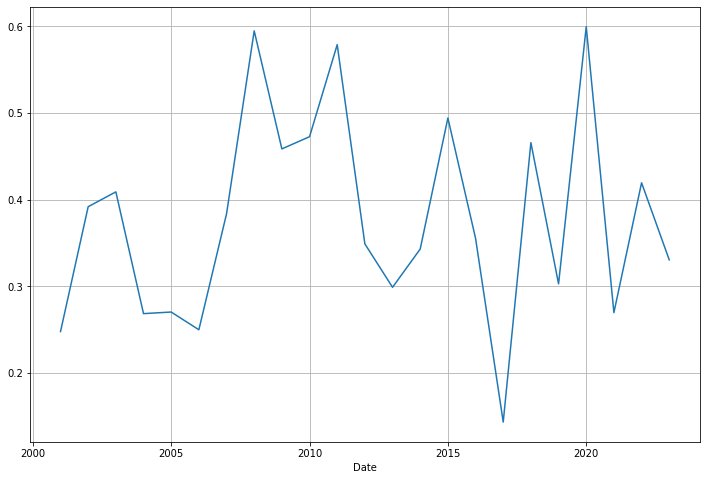

In [26]:
from matplotlib import pyplot as plt

dji_ann.plot(figsize =(12,8) , grid = True)

## Market return data

As a proxy for the return on the market, get download data for the S&P 500 index (ticker symbol: ^GSPC).

In [27]:
snp = yf.download(tickers=['^GSPC'],
                   interval='1d',
                   start='2001-01-01',
                   end='2023-03-01')

snp = snp['Adj Close']
snp

[*********************100%***********************]  1 of 1 completed


Date
2001-01-02    1283.270020
2001-01-03    1347.560059
2001-01-04    1333.339966
2001-01-05    1298.349976
2001-01-08    1295.859985
                 ...     
2023-02-22    3991.050049
2023-02-23    4012.320068
2023-02-24    3970.040039
2023-02-27    3982.239990
2023-02-28    3970.149902
Name: Adj Close, Length: 5574, dtype: float64

Calculate the average return on the index in each year. A typical year has 252 trading days, so multiply the result by 252 to get the annualized return.

In [56]:
snp_ret = snp.pct_change().dropna()
snp_ret_ann = snp_ret.resample('Y').mean()*252

snp_ret_ann.index.year



Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
            2023],
           dtype='int64', name='Date')

In [53]:

type(snp_ret_ann)

snp_ret_ann


Date
2001-12-31   -0.090708
2002-12-31   -0.232379
2003-12-31    0.248721
2004-12-31    0.092262
2005-12-31    0.034836
                ...   
2019-12-31    0.261588
2020-12-31    0.209706
2021-12-31    0.246839
2022-12-31   -0.187851
2023-12-31    0.229198
Freq: A-DEC, Name: Adj Close, Length: 23, dtype: float64

Combine the index annual return data with the average correlation data.

You can use `pd.merge` but `pd.concat` might be easier if you first make sure both Series have the same index.

Ask if the correlation data is from Dow Jones Industrial Average.

In [60]:
dji_ann.head()

Date
2001    0.247941
2002    0.391937
2003    0.409049
2004    0.268618
2005    0.270457
Name: corr, dtype: float64

In [62]:
snp_ret_ann.index = snp_ret_ann.index.year

In [63]:
ann_ret_corr = pd.concat([snp_ret_ann, dji_ann], axis = 1)
ann_ret_corr

,Adj Close,corr
Date,,
2001,-0.090708,0.247941
2002,-0.232379,0.391937
2003,0.248721,0.409049
2004,0.092262,0.268618
2005,0.034836,0.270457
...,...,...
2019,0.261588,0.302967
2020,0.209706,0.599539
2021,0.246839,0.269747


Finally, calculate the correlation between the annual return and the annual average correlation. Be sure to interpret the result.

In [31]:
ann_ret_corr.corr()

,Adj Close,corr
Adj Close,1.0,NaN
corr,NaN,1.0


# Calculating beta

Next we'll estimate β for each stock. As an example, here's how we can estimate β for 3M.

In [32]:
import statsmodels.api as sm

First, we combine the market return data with the individual stock return series.

For the first concat, not sure if we are supposed to name the variables the exact same things as what it is in the commented section.

In [33]:
# reg = pd.concat([sp500, rets_dow['MMM']], axis=1).dropna()
reg = pd.concat([snp_ret, dji_ret['MMM']], axis=1).dropna()

reg

,Adj Close,MMM
Date,,
2001-01-03,0.050099,-0.011537
2001-01-04,-0.010552,0.010079
2001-01-05,-0.026242,-0.037290
2001-01-08,-0.001918,0.006001
2001-01-09,0.003812,-0.015727
...,...,...
2023-02-22,-0.001574,-0.002838
2023-02-23,0.005329,-0.000275
2023-02-24,-0.010538,-0.010192


Then we run a regression, being sure to add a constant term.

In [34]:
model = sm.OLS(reg['MMM'], sm.add_constant(reg['Adj Close']))
results = model.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MMM   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     5577.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:17:01   Log-Likelihood:                 17566.
No. Observations:                5573   AIC:                        -3.513e+04
Df Residuals:                    5571   BIC:                        -3.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.605e-05      0.000      0.621      0.5

The estimate of β is stored in the `.params` property.

In [36]:
results.params[-1]

0.8339603719796371

Now iterate over the DJIA tickers and estimate beta for each stock. Save the estimates in a list.

(Note that statsmodels cannot handle missing data, so you have to remove any before attempting to run the regression.)

In [37]:
dji_stocks = list(dji.columns)
beta_dji = {}

for i in dji_stocks:
    reg = pd.concat([snp_ret,dji_ret[i]],axis = 1).dropna()
    model = sm.OLS(reg[i], sm.add_constant(reg['Adj Close']))
    results = model.fit()
    beta = results.params[-1]
    beta_dji[i] = beta

beta_dji


{'AAPL': 1.1163624208046465,
 'AMGN': 0.7848077161715117,
 'AXP': 1.3818101371297211,
 'BA': 1.1243953917370766,
 'CAT': 1.1311320052911735,
 'CRM': 1.275298755013034,
 'CSCO': 1.1852088090552684,
 'CVX': 0.959810845532148,
 'DIS': 1.0895751072158861,
 'DOW': 1.1522944888951634,
 'GS': 1.328438607803718,
 'HD': 1.0192642628307713,
 'HON': 1.08995075114235,
 'IBM': 0.8518759652590294,
 'INTC': 1.2353717591568891,
 'JNJ': 0.5484056313955762,
 'JPM': 1.4360442881407922,
 'KO': 0.5747126126504695,
 'MCD': 0.621030070881092,
 'MMM': 0.8339603719796371,
 'MRK': 0.6979668108123097,
 'MSFT': 1.0886234826251266,
 'NKE': 0.9185582365938216,
 'PG': 0.5409555484591119,
 'TRV': 0.9465550464465403,
 'UNH': 0.8485417568936922,
 'V': 1.0102175408963647,
 'VZ': 0.6721972067394274,
 'WBA': 0.7543705590665503,
 'WMT': 0.5921113241854212}

Create a `Series` from the list of betas. Set the index of the series to be the columns in `rets_dow` (that is, the ticker symbols).

In [38]:
series = pd.Series(beta_dji,dji_stocks)
series

AAPL    1.116362
AMGN    0.784808
AXP     1.381810
BA      1.124395
CAT     1.131132
          ...   
UNH     0.848542
V       1.010218
VZ      0.672197
WBA     0.754371
WMT     0.592111
Length: 30, dtype: float64

What company as the highest beta? The lowest?

In [39]:
max_series = series.idxmax()
min_series = series.idxmin()

print("Min beta company", min_series, "\nMax beta company", max_series)

Min beta company PG 
Max beta company JPM


Plot a histogram of the betas.

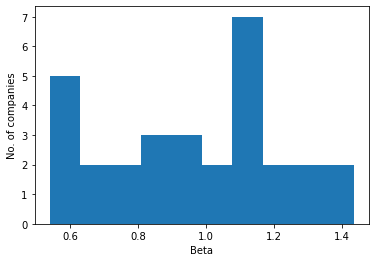

In [40]:
plt.hist(series,10)
plt.xlabel("Beta")
plt.ylabel("No. of companies")
plt.show()

For this excercise you used 20 years of data to estimate the betas. What problems might there be with this approach?